## Dataset Introduction
* In this analysis, we explore a dataset that comes from [Open source](https://www.yelp.com/dataset) Yelp. It is a subset of Yelp businesses, reviews, and user data for use in connection with academic research. Available as JSON files. 
* It contains 6,990,280 reviews by 1,987,897 users. I use 
* Use the review.json from open source part in yelp after simple opration
## Aim
* 
    * Supervised learning: Sentence Sentiment Classification, categorized as positive reviews, negative reviews, neutral reviews
    * Unsupervised learning: anomaly detection, check for outliers, remove outliers and perform supervised learning again Measure the effectiveness of unsupervised learning for data dimensionality reduction

In [1]:
import pandas as pd
PATH = '/Users/fangzheng/Downloads/archive 2/yelp_academic_dataset_review.json'

* Since the whole json is too large, we prefer 20,000 rows as our dataset instead of 6,990,280 rows.
* To get faster read, we read it in batch, the batch size set to be 1,0000

In [5]:
chunks = []  
chunk_size = 10000  
with open(PATH, 'r') as file:
    counter = 0
    for chunk in pd.read_json(file, lines=True, chunksize=chunk_size):
        
        if counter >= 20000:
            break  
        chunks.append(chunk)
        counter += chunk.shape[0]  

In [6]:
chunks

[                   review_id                 user_id             business_id  \
 0     KU_O5udG6zpxOg-VcAEodg  mh_-eMZ6K5RLWhZyISBhwA  XQfwVwDr-v0ZS3_CbbE5Xw   
 1     BiTunyQ73aT9WBnpR9DZGw  OyoGAe7OKpv6SyGZT5g77Q  7ATYjTIgM3jUlt4UM3IypQ   
 2     saUsX_uimxRlCVr67Z4Jig  8g_iMtfSiwikVnbP2etR0A  YjUWPpI6HXG530lwP-fb2A   
 3     AqPFMleE6RsU23_auESxiA  _7bHUi9Uuf5__HHc_Q8guQ  kxX2SOes4o-D3ZQBkiMRfA   
 4     Sx8TMOWLNuJBWer-0pcmoA  bcjbaE6dDog4jkNY91ncLQ  e4Vwtrqf-wpJfwesgvdgxQ   
 ...                      ...                     ...                     ...   
 9995  ZcBtCA9jGhLfakf1jJ2BAg  yab1cq5yzrTHzoyz8LYqYQ  1-z7wd860Rii4kbEMCT8DA   
 9996  UIkEO-10J6Y99IhRqUflvg  lYAmgL_l7A3MPFYe1DYKrw  EpREWeEpmR8f1qLHzzF0AA   
 9997  S-NQM3Axcg8JS3MXHUIvyw  rE2WwfgJbYfvDwBlgq__dQ  dvidzWEPgTQPeBc8CUV2OQ   
 9998  ME79YrEhm2xe4IQy_0zkGw  OnIklvzKDpk1BduC84TrTA  2XYPFRm7teCUr3eGsB2-qw   
 9999  05oKtleZ-JFGD6qt47VQcg  p0MhNWkwOPBfRo8qUb7faw  rnaE88k8yV5pFAGJeiIK4Q   
 
       stars  useful  funn

* Merge the data chunks in the chunks list into a DataFrame

In [7]:
full_df = pd.concat(chunks, ignore_index=True)

In [8]:
full_df.columns

Index(['review_id', 'user_id', 'business_id', 'stars', 'useful', 'funny',
       'cool', 'text', 'date'],
      dtype='object')

In [9]:
full_df

,review_id,user_id,business_id,stars,useful,funny,cool,text,date
0,KU_O5udG6zpxOg-VcAEodg,mh_-eMZ6K5RLWhZyISBhwA,XQfwVwDr-v0ZS3_CbbE5Xw,3,0,0,0,"If you decide to eat here, just be aware it is...",2018-07-07 22:09:11
1,BiTunyQ73aT9WBnpR9DZGw,OyoGAe7OKpv6SyGZT5g77Q,7ATYjTIgM3jUlt4UM3IypQ,5,1,0,1,I've taken a lot of spin classes over the year...,2012-01-03 15:28:18
2,saUsX_uimxRlCVr67Z4Jig,8g_iMtfSiwikVnbP2etR0A,YjUWPpI6HXG530lwP-fb2A,3,0,0,0,Family diner. Had the buffet. Eclectic assortm...,2014-02-05 20:30:30
3,AqPFMleE6RsU23_auESxiA,_7bHUi9Uuf5__HHc_Q8guQ,kxX2SOes4o-D3ZQBkiMRfA,5,1,0,1,"Wow! Yummy, different, delicious. Our favo...",2015-01-04 00:01:03
4,Sx8TMOWLNuJBWer-0pcmoA,bcjbaE6dDog4jkNY91ncLQ,e4Vwtrqf-wpJfwesgvdgxQ,4,1,0,1,Cute interior and owner (?) gave us tour of up...,2017-01-14 20:54:15
...,...,...,...,...,...,...,...,...,...
19995,ozjDTiDHs8zUE9O9Mwdcfw,CPfSzjfSfeLt4OfvJYlCxA,LqY3NrBE0trSnDj87KAn3A,1,0,0,0,Manager is a complete asshole. If you have a ...,2015-01-04 04:29:23
19996,hO3x1T5GGLr364xFt4Qq5A,uj_nMeaRbRr22cVgW741fw,bvtYf4NMjv3riSrDaK9P5w,4,4,2,1,"If you're looking for Bingo around St Louis, t...",2013-02-22 18:53:06
19997,Y4kQX2M0bL2m9moMGY7Ymg,wNMM0NBMLwJ-Zw-tlwUQZw,SZU9c8V2GuREDN5KgyHFJw,2,0,0,0,Unfortunately we had a bad experience here...w...,2017-04-30 21:13:31
19998,oelAc92svkTHjesb6fnfzw,GG0mFsEXb-02_dzFPqRV1Q,-97632CUoOkJ8x4AlkPJxQ,2,0,0,0,Meh. This pizza was basically a deep-dish grea...,2014-07-28 14:49:35


In [10]:
star_distribution = full_df['stars'].value_counts()
print(star_distribution)

stars
5    8901
4    5130
3    2241
1    2157
2    1571
Name: count, dtype: int64


* Visualize the stars distribution in the dataset

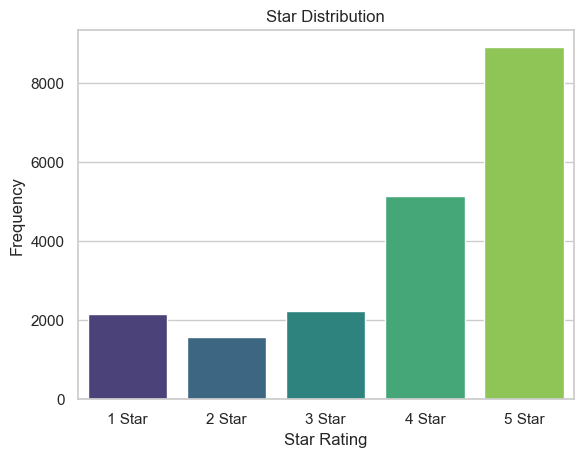

In [30]:
import seaborn as sns
import matplotlib.pyplot as plt

star_labels = ["1 Star", "2 Star", "3 Star", "4 Star", "5 Star"]

sns.set(style="whitegrid")
ax = sns.countplot(data=full_df, x='stars', palette='viridis')

ax.set_title("Star Distribution")
ax.set_xlabel("Star Rating")
ax.set_ylabel("Frequency")

ax.set_xticklabels(star_labels)

plt.show()


* Flag those with stars greater than 3 as positive reviews, those less than 3 as negative reviews, and those equal to 3 as neutral reviews.

In [12]:
def assign_label(stars):
    if stars > 3:
        return 2
    elif stars < 3:
        return 0
    else:
        return 1

In [13]:
full_df = full_df[['stars','text']]
full_df
full_df['label'] = full_df['stars'].apply(assign_label)
negative_df = full_df[full_df['stars'] < 3]
positive_df = full_df[full_df['stars'] > 3]
neutral_df = full_df[full_df['stars'] == 3]

/var/folders/pn/q7mmpvpx5n36lk_j6p9gqk4c0000gn/T/ipykernel_13518/2745538415.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  full_df['label'] = full_df['stars'].apply(assign_label)


In [14]:
negative_df

,stars,text,label
5,1,I am a long term frequent customer of this est...,0
29,2,I at least have to give this restaurant two st...,0
41,2,"Straight to the point, it's cheap, it tastes a...",0
46,2,NEVER AGAIN. This is a so called restaurant th...,0
47,1,If you want to pay for everything a la carte t...,0
...,...,...,...
19984,1,"Lost my reservation for two people, not going ...",0
19994,2,I have been here twice. The first time the rib...,0
19995,1,Manager is a complete asshole. If you have a ...,0
19997,2,Unfortunately we had a bad experience here...w...,0


In [15]:
positive_df

,stars,text,label
1,5,I've taken a lot of spin classes over the year...,2
3,5,"Wow! Yummy, different, delicious. Our favo...",2
4,4,Cute interior and owner (?) gave us tour of up...,2
6,5,Loved this tour! I grabbed a groupon and the p...,2
7,5,Amazingly amazing wings and homemade bleu chee...,2
...,...,...,...
19990,5,I had a friend visit me on several occasions a...,2
19991,4,Happened to stop at Zorba's on our way back fr...,2
19992,5,This restaurant has been open just about a mon...,2
19996,4,"If you're looking for Bingo around St Louis, t...",2


In [16]:
neutral_df

,stars,text,label
0,3,"If you decide to eat here, just be aware it is...",1
2,3,Family diner. Had the buffet. Eclectic assortm...,1
8,3,This easter instead of going to Lopez Lake we ...,1
9,3,Had a party of 6 here for hibachi. Our waitres...,1
21,3,"Upland is a brewery based out of Bloomington, ...",1
...,...,...,...
19956,3,Had the greek lasagna and greek potatoes. Pre...,1
19976,3,"I really liked the smaller portions, it allowe...",1
19980,3,I wouldn't say this place is anything special ...,1
19986,3,Enjoyed the shrimp poboys... We tried each kin...,1


In [17]:
import pandas as pd
from sklearn.model_selection import train_test_split
train_df, test_df = train_test_split(full_df, test_size=0.2, random_state=42)


In [18]:
def clear_character(sentence):
    new_sentence=''.join(sentence.split('\n')) #去除空白
    return new_sentence
train_df["text"] = train_df['text'].apply(clear_character)
train_df.head()
test_df["text"] = test_df['text'].apply(clear_character)
test_df.head(20)

,stars,text,label
10650,5,Thank you for great bottle service for bday an...,2
2041,3,"The experience is fun and girly, but the food ...",1
8668,5,This deli is truly as good as it gets. From t...,2
1114,4,Great staff. Nothing is ever disappointing - ...,2
13902,4,My friend lives across the street from here so...,2
11963,5,Looking at the photos of this place makes me h...,2
11072,3,Good food but the quality doesn't seem to just...,1
3002,5,Came to visit my daughter and we had dinner to...,2
19771,3,Every night at The Barbary is a different expe...,1
8115,2,The only benefit to coming here is large porti...,0


* save the train & test set after split the data at ratio 4:1

In [8]:
import os
os.makedirs('train', exist_ok=True)
os.makedirs('test', exist_ok=True)


In [17]:
full_df.to_csv('full_df.csv', index=False)
train_df.to_csv('train/train_df.csv', index=False)
test_df.to_csv('test/test_df.csv', index=False)


In [18]:
label_distribution = full_df['label'].value_counts()
label_distribution

label
2    14031
0     3728
1     2241
Name: count, dtype: int64

### Visualize the data label
* find there exist the imbalanced data in our dataset

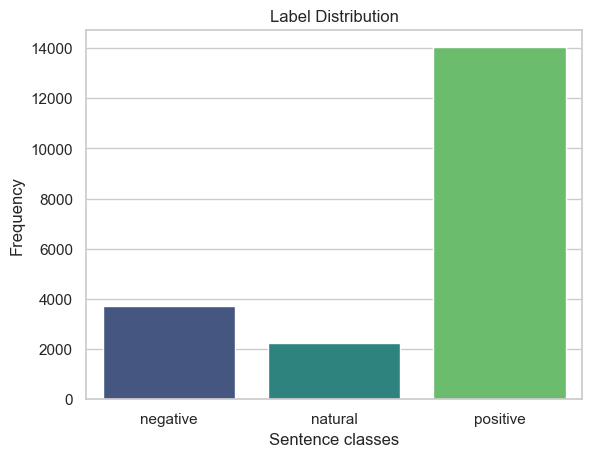

In [31]:
import seaborn as sns
import matplotlib.pyplot as plt

labels = ["negative", "natural", "positive"]

sns.set(style="whitegrid")
ax = sns.countplot(data=full_df, x='label', palette='viridis')

ax.set_title("Label Distribution")
ax.set_xlabel("Sentence classes")
ax.set_ylabel("Frequency")

ax.set_xticklabels(labels)

plt.show()
